In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb
plt.style.use(['ggplot'])

Create Data

Generate some data with:

$\theta_0= 4$

$\theta_1= 3$

$y = \theta_0 + \theta_1  x$

Add some Gaussian noise to the data. 

In [2]:
theta_0 = 4
theta_1 = 3

n_samples = 1000

np.random.seed(10)
X = 2 * np.random.rand(n_samples,1)
y = theta_0 + theta_1 * X+np.random.randn(n_samples,1)*2

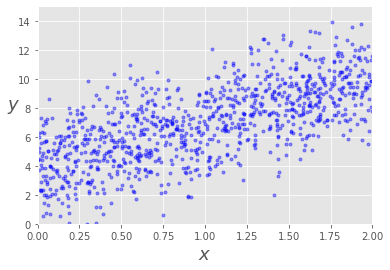

In [3]:
"""
Let's plot our data to check the relation between X and Y
"""
plt.figure(1)
plt.plot(X,y,'b.',alpha=0.4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

Analytical way of Linear Regression

In matrix form:
    A = [1 , X]
    theta = [$\theta_0, \theta_1]^t$

with 1 column of 1's and X a column vector containing the sample X's

So $y = A \theta$

Use the inverse to calculate the **analytical solution**:
    $\theta = [ (A^T A)^{(-1)} A^T ] y$


In [5]:
A = np.c_[np.ones((X.size,1)),X] #Concatenate a vector of 1's as first column of A.
theta_analytical = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
print('theta analytical: [ {:0.3f} , {:0.3f} ]^T'.format(theta_analytical[0][0],theta_analytical[1][0]))

theta analytical: [ 3.932 , 3.030 ]^T


(0.0, 2.0, 0.0, 15.0)

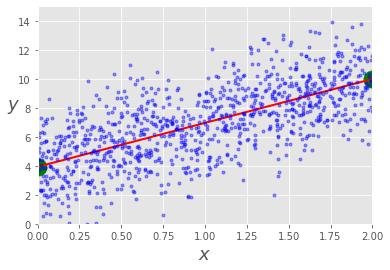

In [6]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(X),max(X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta_analytical)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-',lw=2)
plt.scatter(X_ln,y_ln,s=300,color='green')
plt.plot(X,y,'b.',alpha=0.4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


Compute the residual error, as given by the cost function $J(\theta)$

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(\theta^{(i)}) - y^{(i)})^2 $

where $y^{(i)} =   h^{(i)}\theta =   [1 , X] \theta =   A^{(i)} \theta$


In [7]:
def cal_cost(theta,X,y):
    '''
    theta = [theta_0 theta_1] is a 2 X 1 vector
    A = [1 , X]
    y = A theta
    '''
    A = np.c_[np.ones((X.size,1)),X]

    m = len(y)
    y_pred = A.dot(theta)
    J = (0.5/m) * np.sum(np.square(y_pred-y))
    
    return J


J = cal_cost(theta_analytical,X,y)
print('Cost / MSE (analytical):   {:0.3f}'.format(J))

Cost / MSE (analytical):   1.925


In [8]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    A = [1 , X]
    y = A theta
    theta = [theta_0 theta_1] is a 2 X 1 vector
    alpha = learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    A = np.c_[np.ones((X.size,1)),X]

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,theta.shape[0]))
    update_values=np.zeros_like(theta_history)
    mean_update_values=np.zeros_like(theta_history)
    scaled_update_values=np.zeros_like(theta_history)

    for it in range(iterations):
        #Bookkeeping
        _cost = cal_cost(theta,X,y)          #Calculate `cost` i.e., loss function value at current theta.
        cost_history[it] = _cost             #Store `cost`
        theta_history[it,:] = theta.ravel()  #Store current value of `theta`
        
        #Start Gradient Descent Updates
        update_val=((np.dot(A,theta) - y).T.dot(A)).T           #Update val is (2 X 1)
        mean_update_val = (1/m)*update_val                      # Scale by dividing by number of data instances.
        scaled_update_val = alpha*mean_update_val               # Scale by multiplying with learning rate
        update_values[it,:] = update_val.ravel()                # flatten update value and store. (Bookkeeping)
        mean_update_values[it,:] = mean_update_val.ravel()      # flatten mean update value and store. (Bookkeeping)
        scaled_update_values[it,:] = scaled_update_val.ravel()  # flatten scaled update value and store. (Bookkeeping)
        theta = theta - scaled_update_val                       #Batch Gradient Descent Update Step
        
    return theta, cost_history, theta_history,update_values,mean_update_values,scaled_update_values

In [9]:
"""
Let's start with 500 iterations and a learning rate of 0.01
Start with a random theta (extracted from a Gaussian distribution mean 0 std 1)
"""

alpha =0.01
n_iter = 5000

np.random.seed(20)
theta_start = np.random.randn(2,1) #theta is a 2  X 1 vector

#theta,cost_history,theta_history = gradient_descent(X,y,theta_start,alpha,n_iter)
theta_grad,cost_history,theta_history,update_values,\
mean_update_values,scaled_update_values =gradient_descent(X,y,theta_start,alpha,n_iter)

print('Theta Analytical: [ {:0.3f} , {:0.3f} ]^t'.format(theta_analytical[0][0],theta_analytical[1][0]))
print('Theta (GD)\t: [ {:0.3f} , {:0.3f} ]^t'.format(theta_grad[0][0],theta_grad[1][0]))
print('Cost / MSE (GD)\t:   {:0.3f}'.format(cost_history[-1]))

Theta Analytical: [ 3.932 , 3.030 ]^t
Theta (GD)	: [ 3.932 , 3.030 ]^t
Cost / MSE (GD)	:   1.925


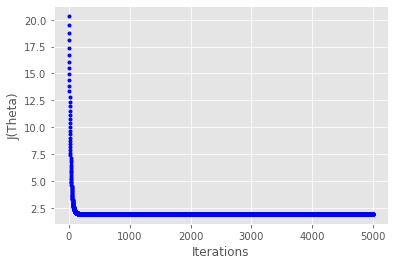

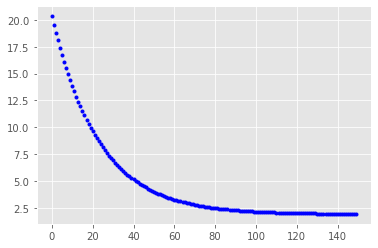

In [10]:

""" Let's plot the cost history over iterations"""

fig,ax = plt.subplots(num=2)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

""" Let us zoom in till iteration 150 """
fig,ax = plt.subplots(num=3)
_=ax.plot(range(150),cost_history[:150],'b.')

# Create Plots of evolution of `theta` with training.

/var/folders/w7/ntqh397j7r1g34xm7y1cnzn40000gn/T/ipykernel_3009/1242074910.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,1,figsize=(7,6))


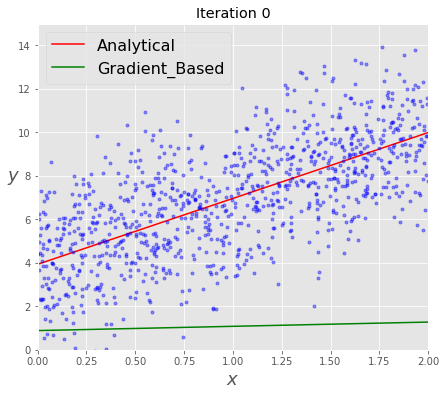

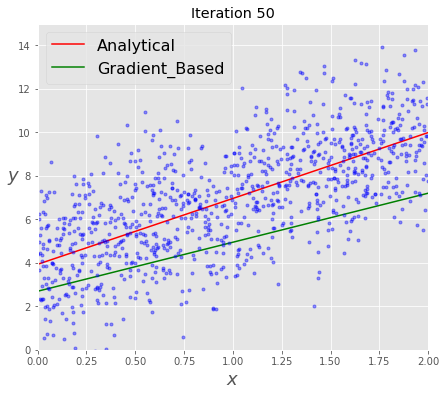

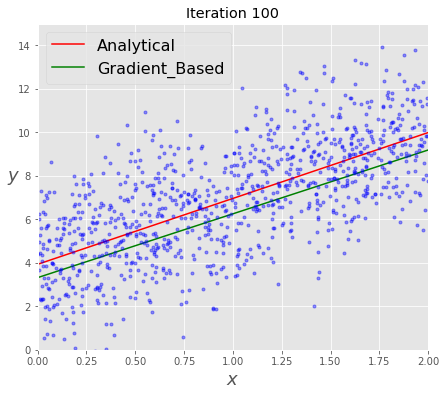

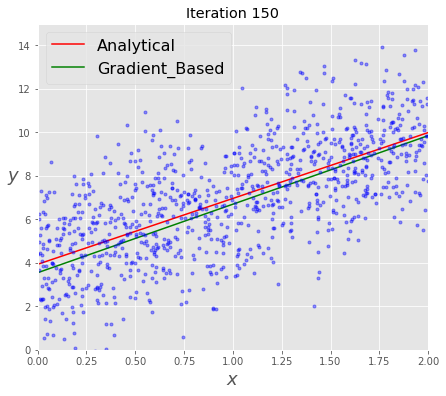

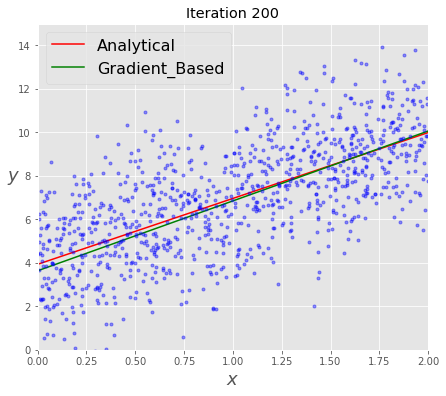

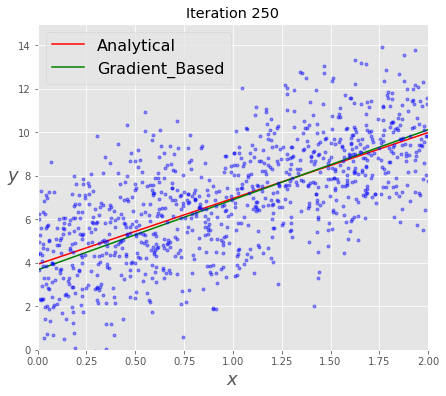

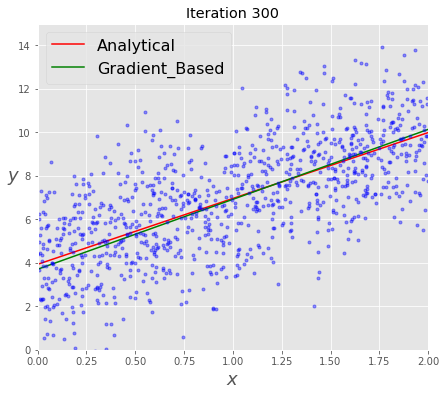

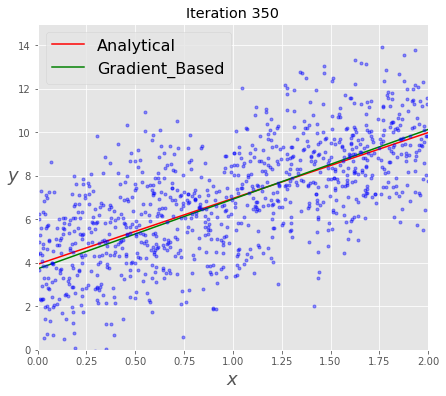

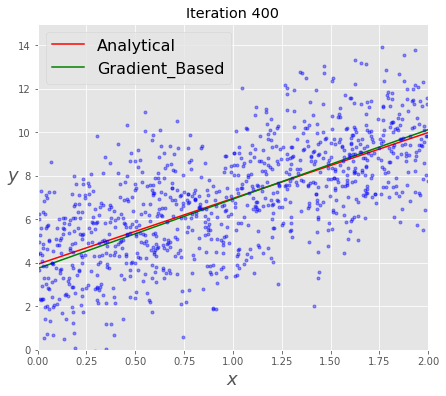

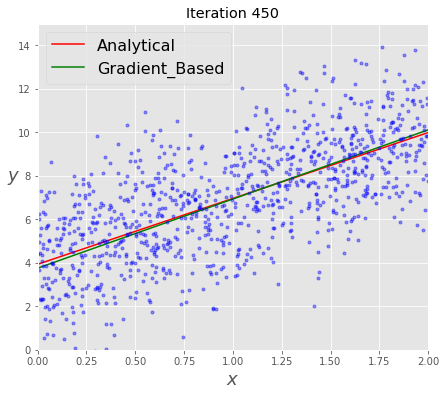

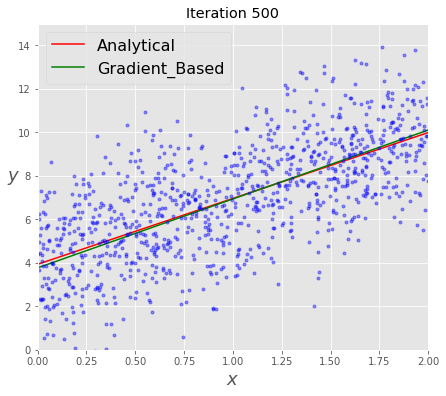

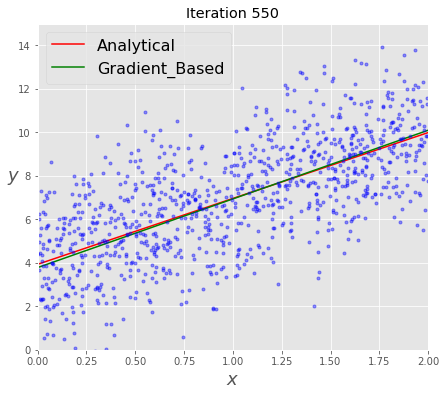

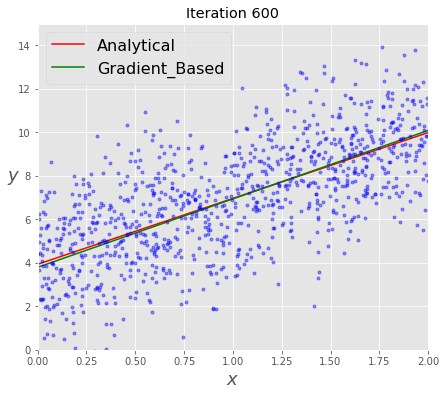

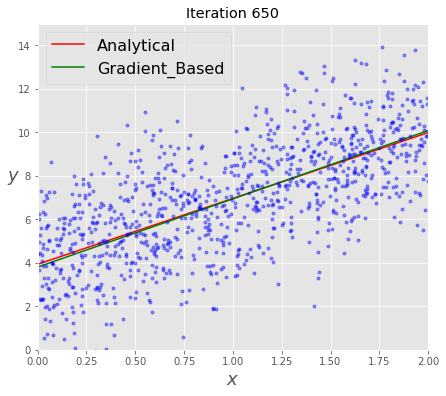

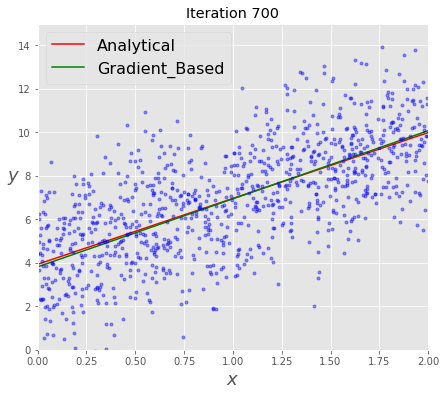

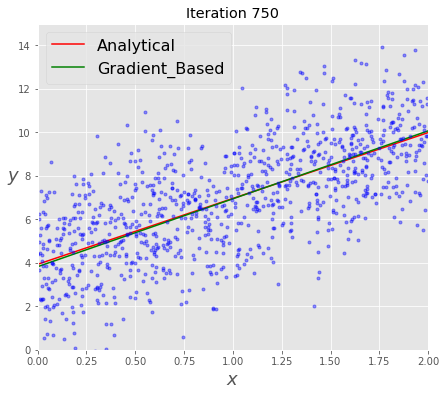

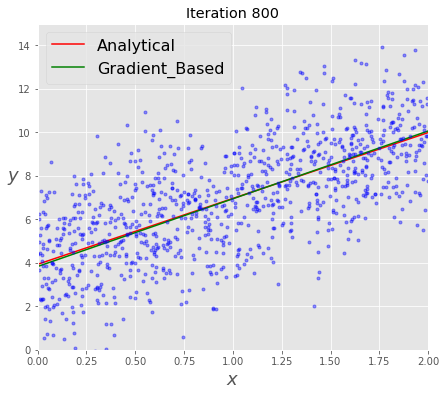

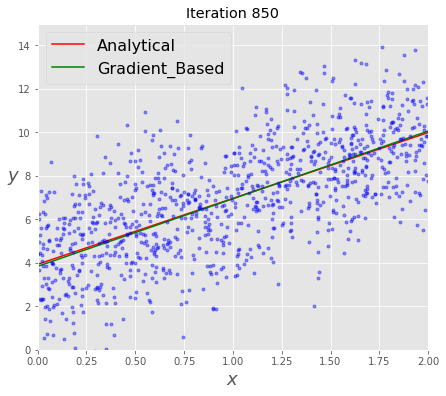

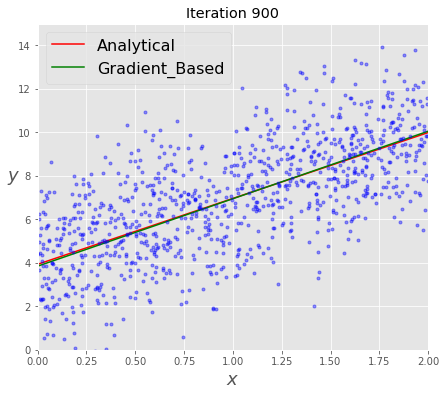

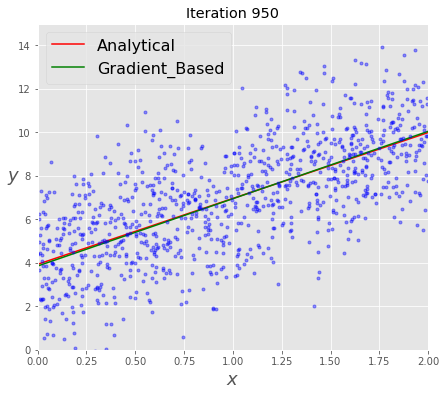

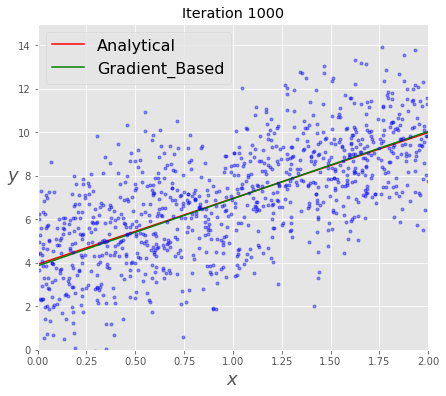

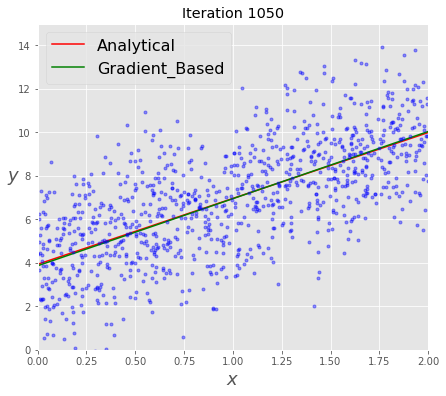

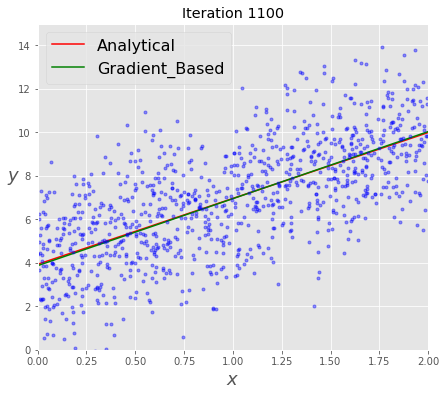

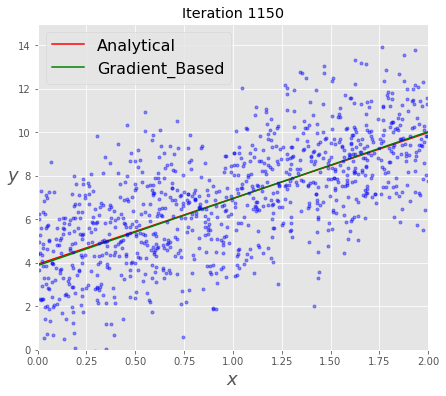

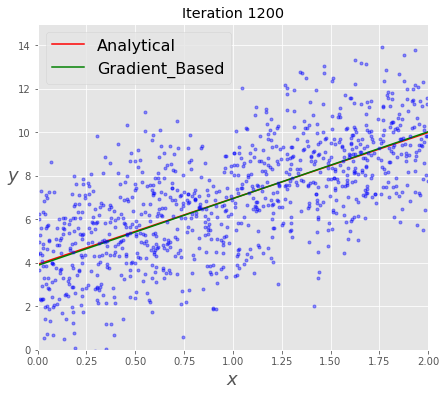

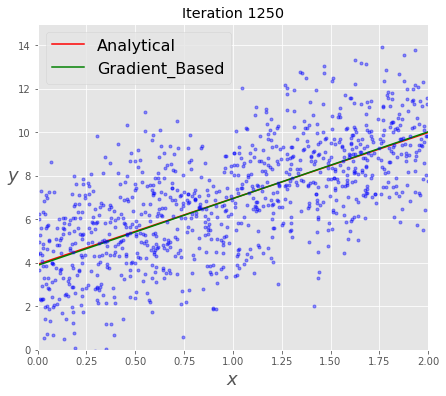

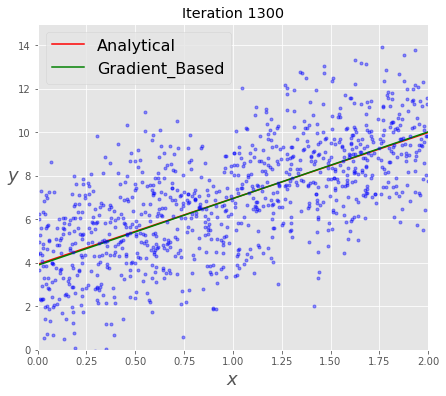

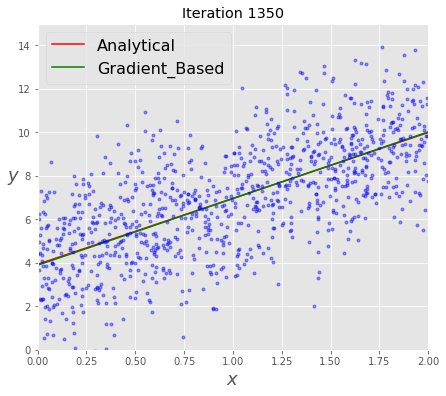

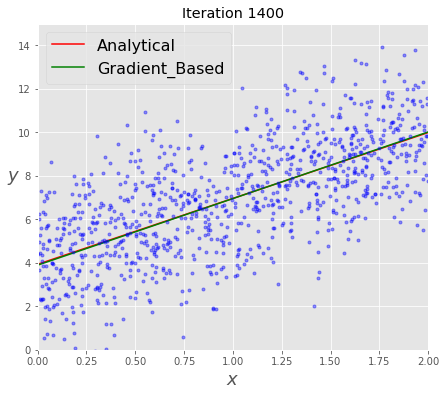

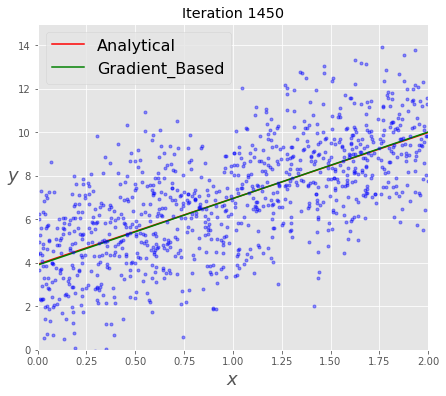

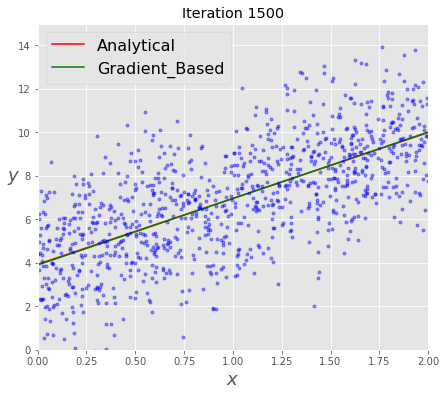

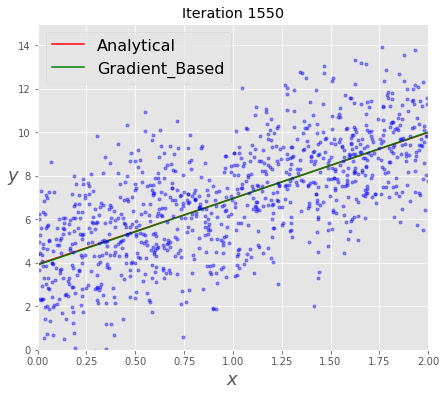

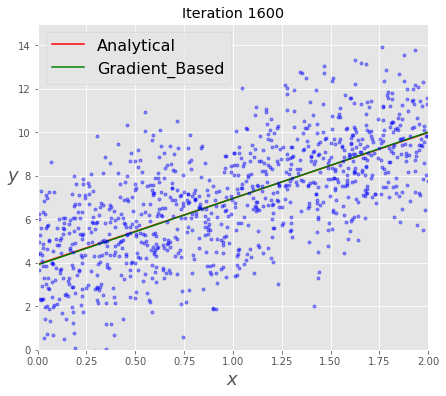

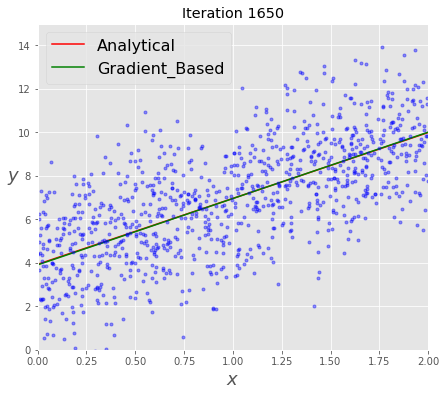

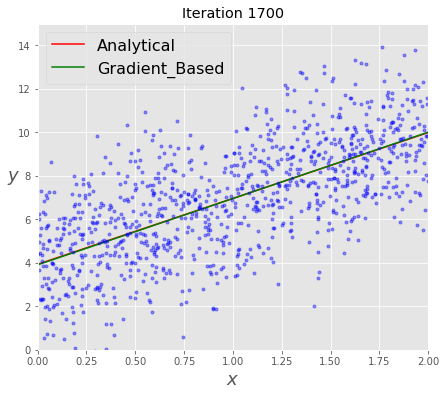

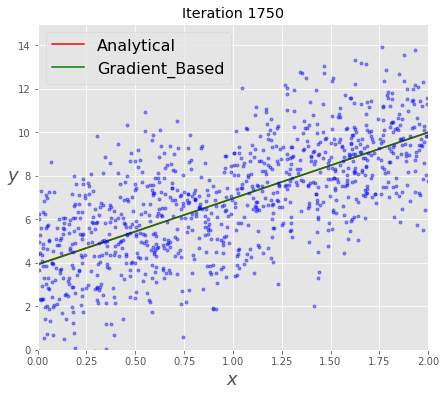

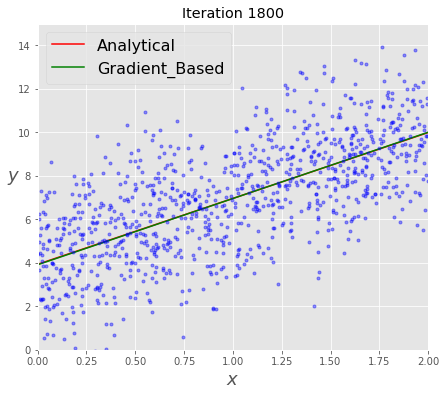

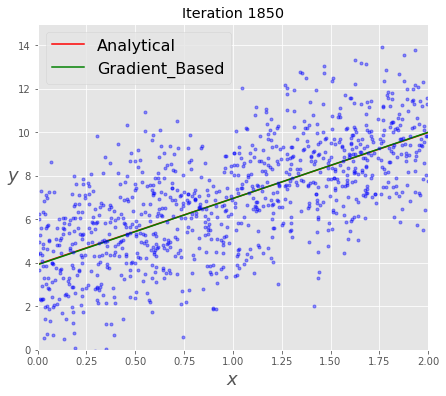

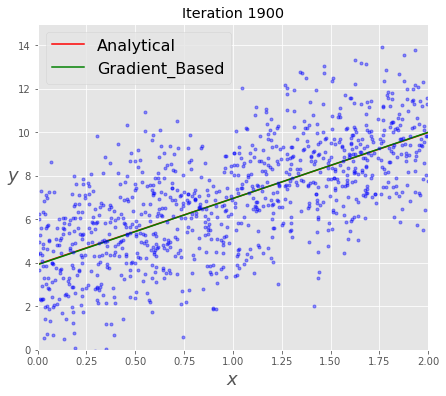

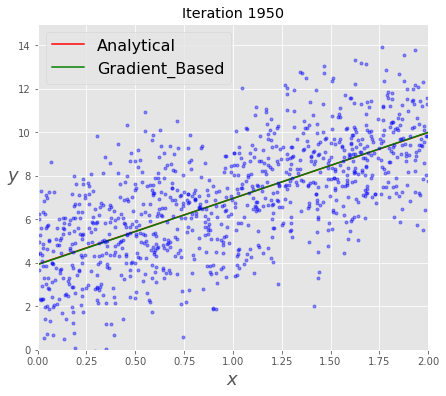

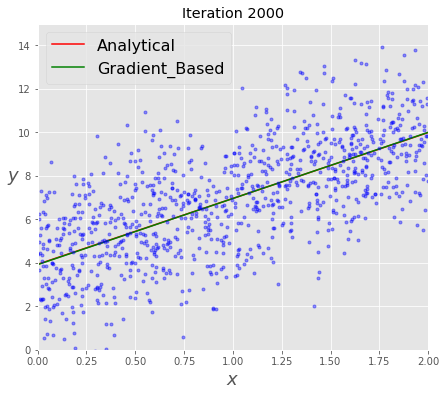

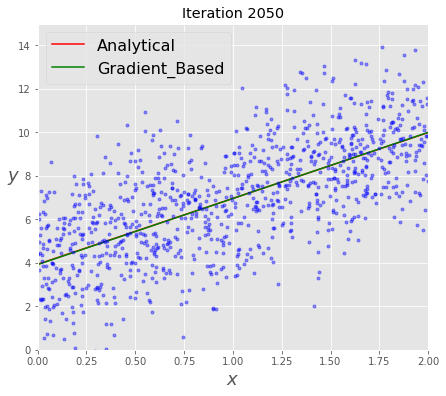

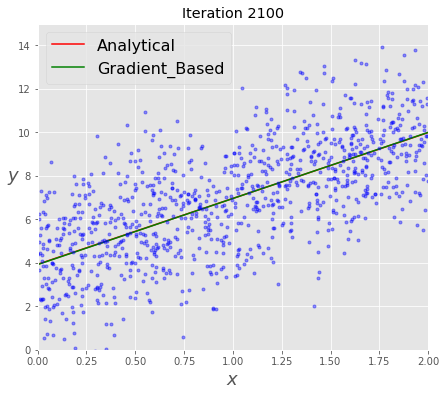

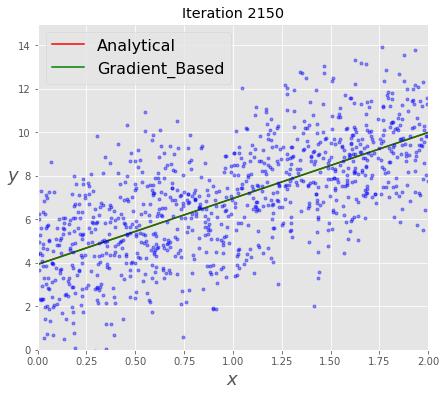

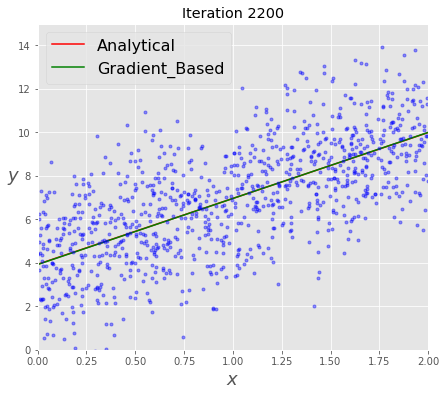

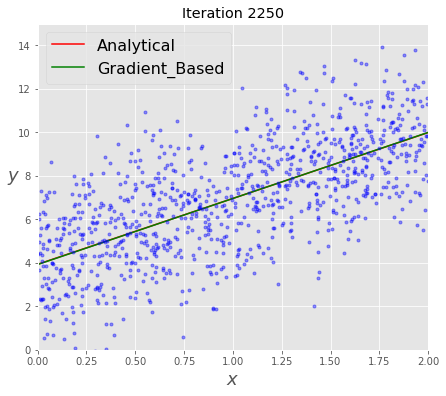

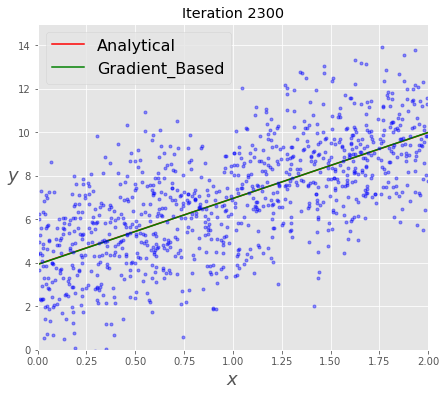

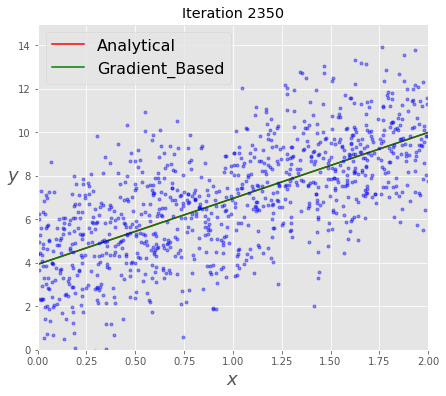

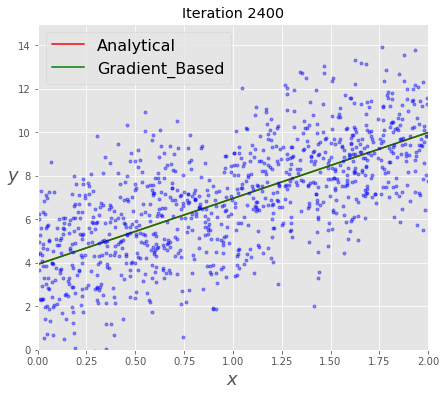

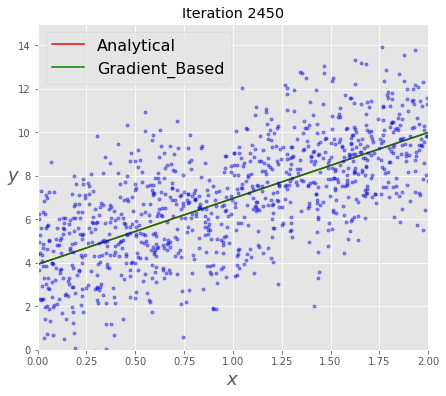

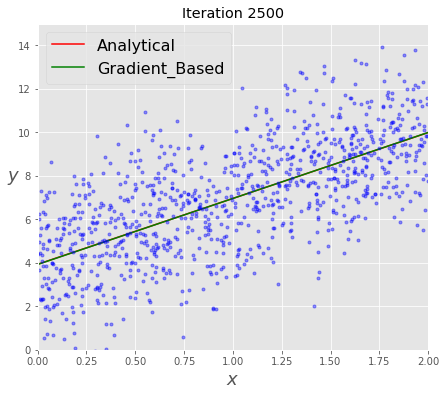

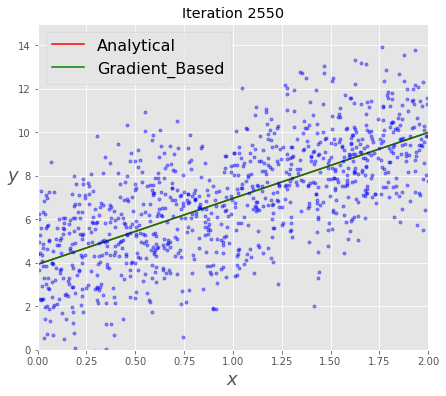

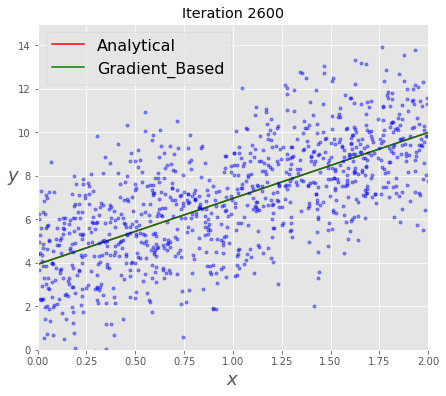

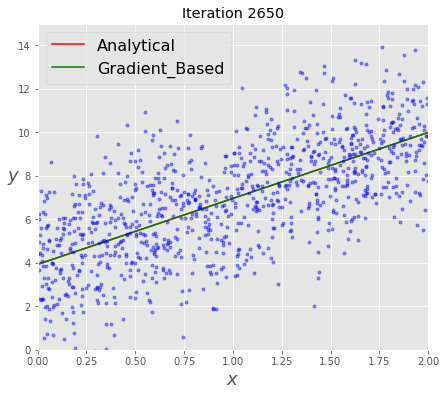

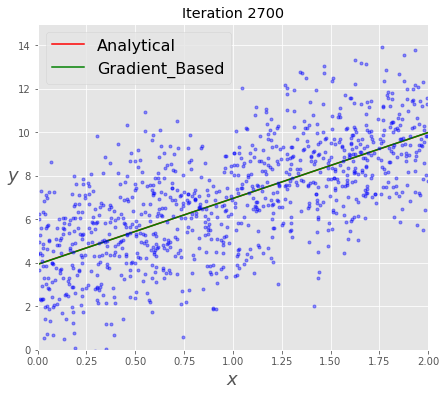

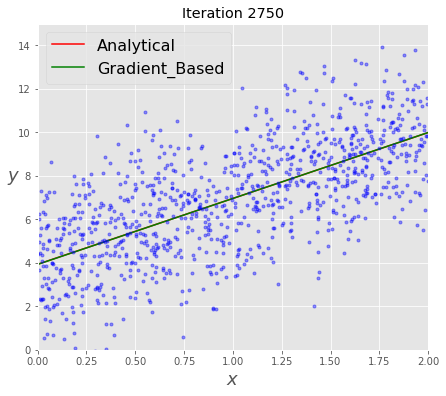

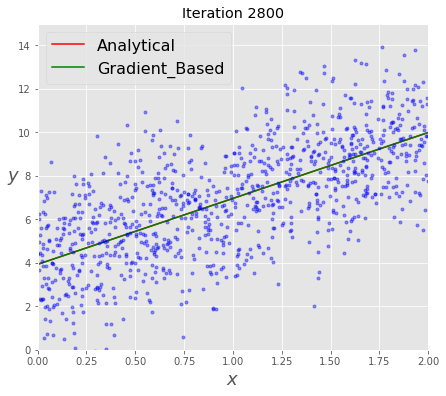

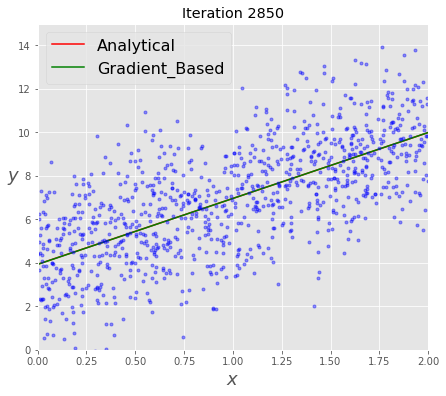

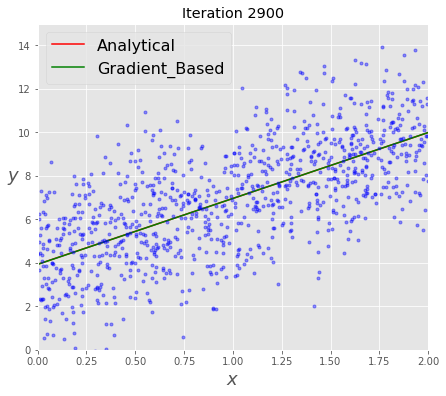

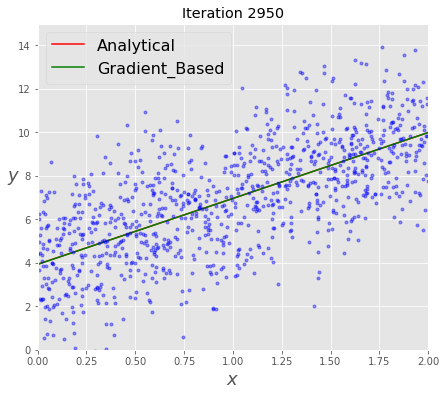

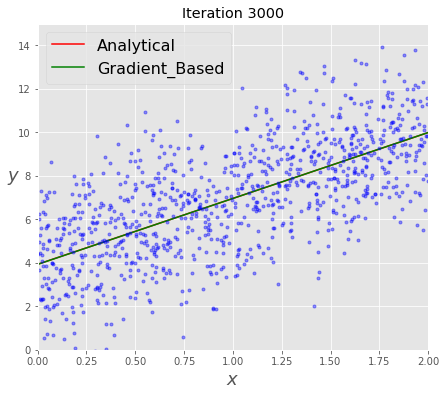

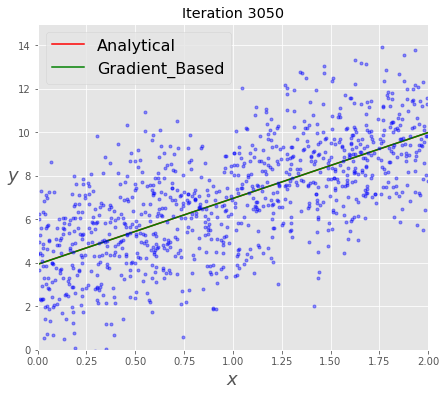

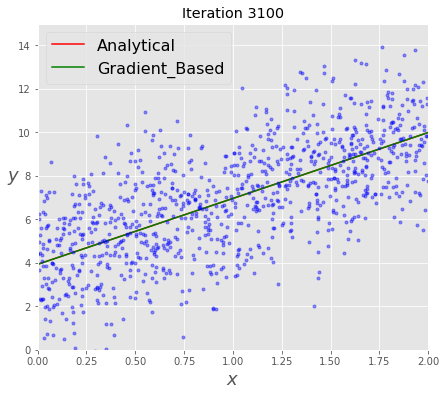

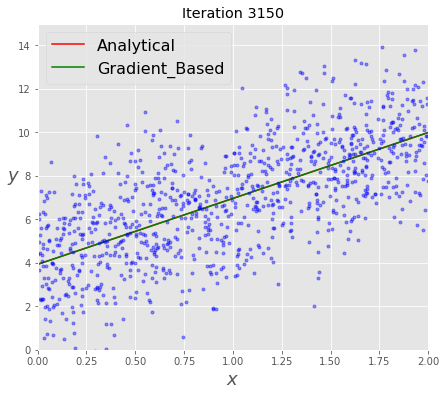

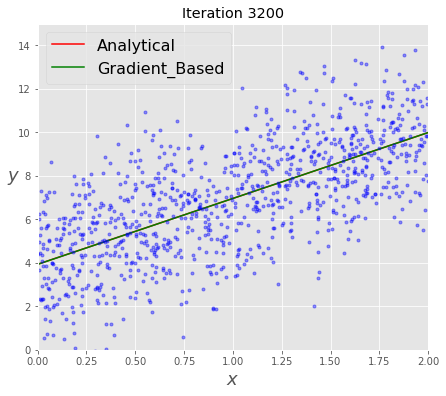

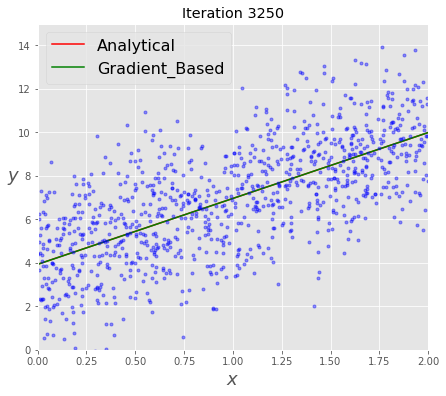

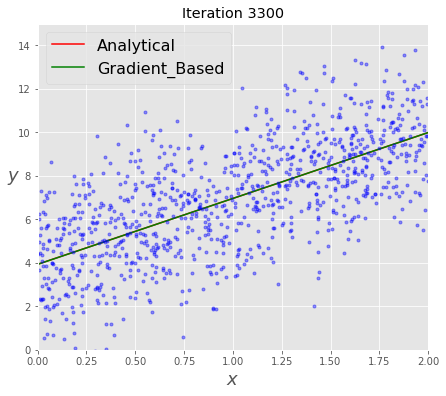

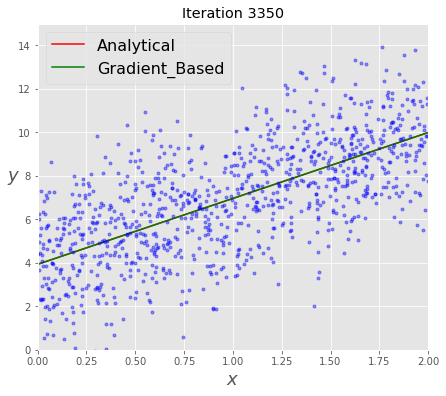

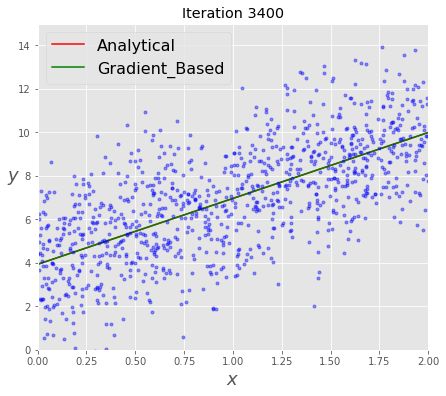

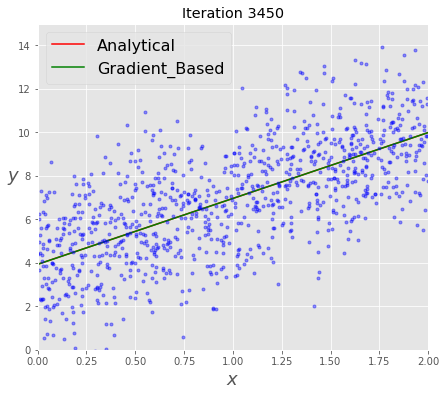

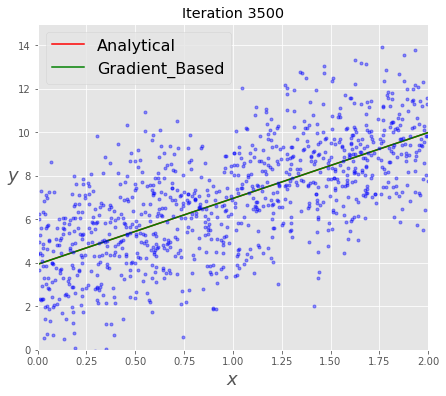

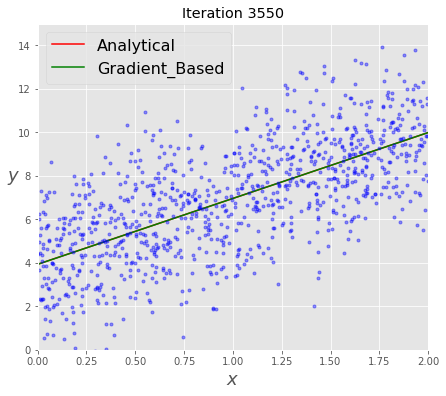

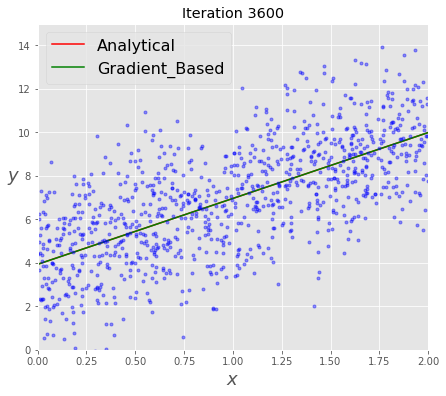

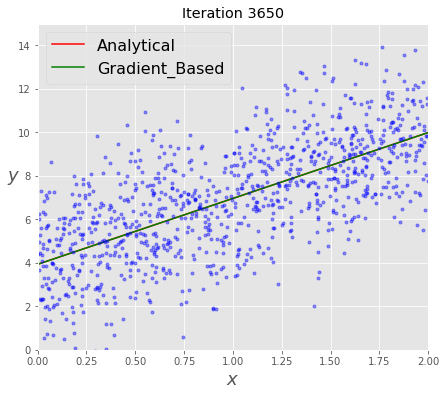

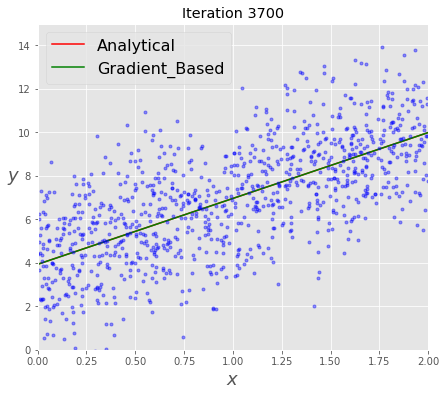

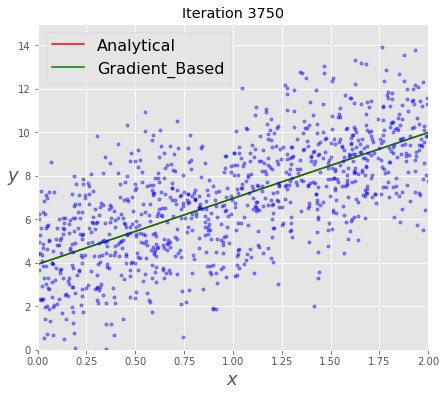

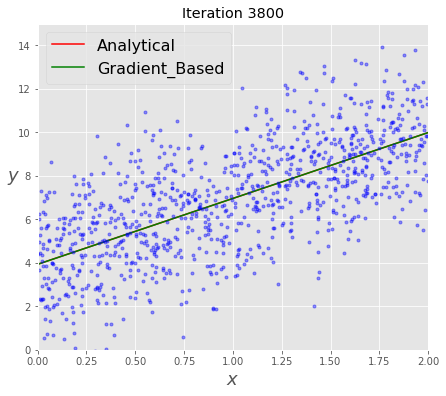

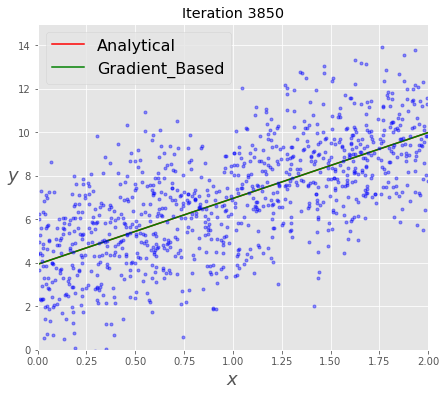

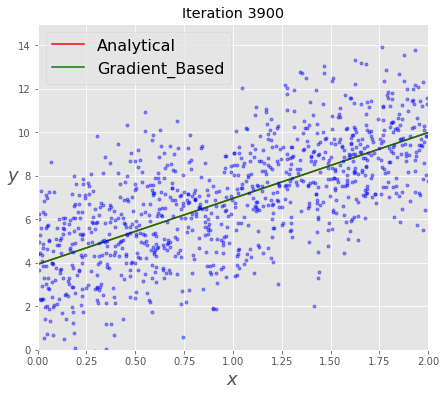

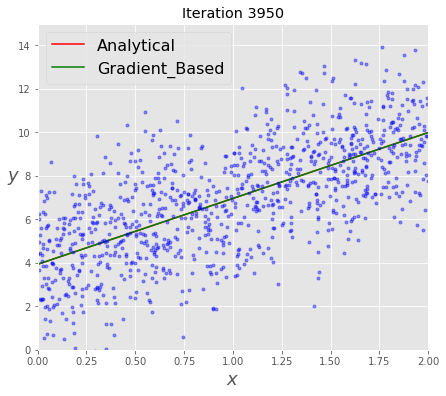

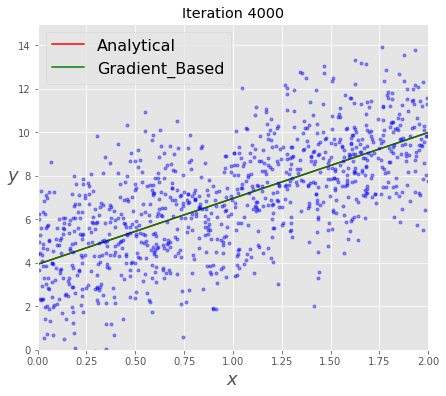

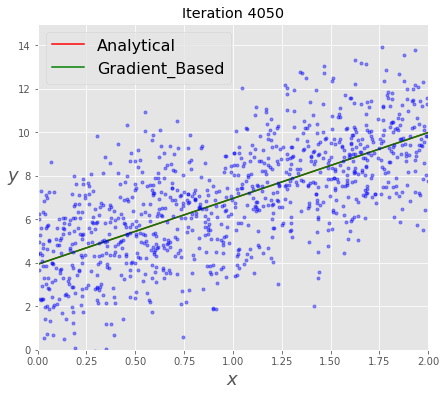

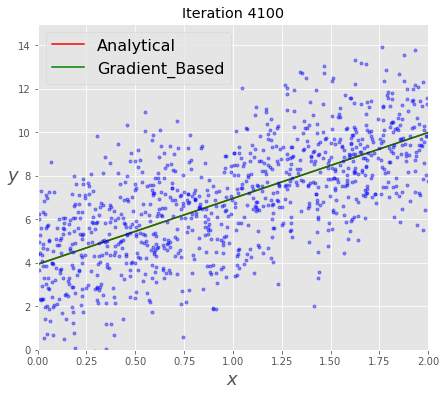

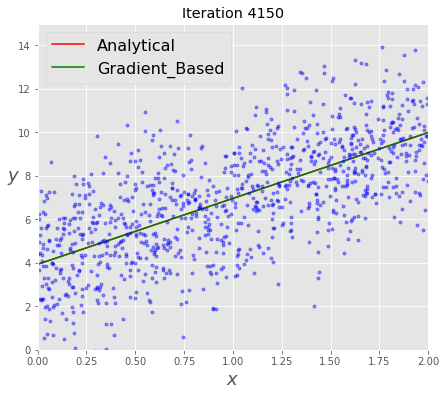

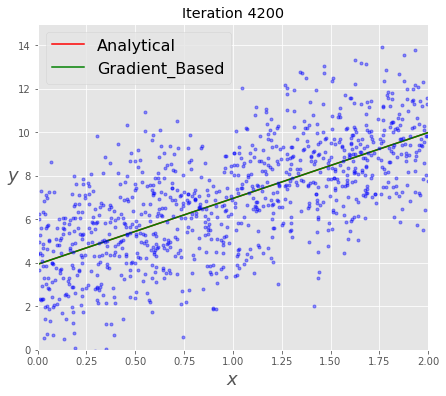

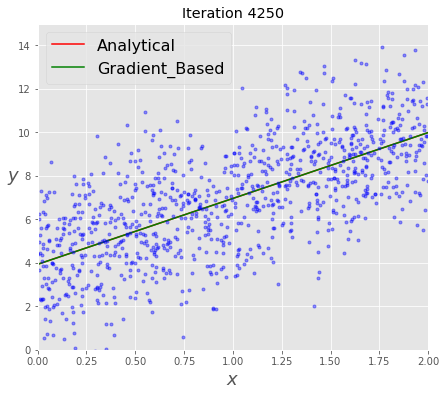

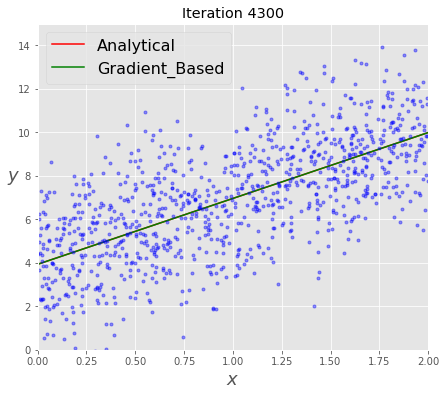

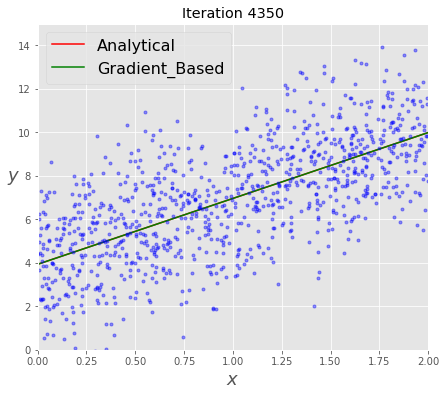

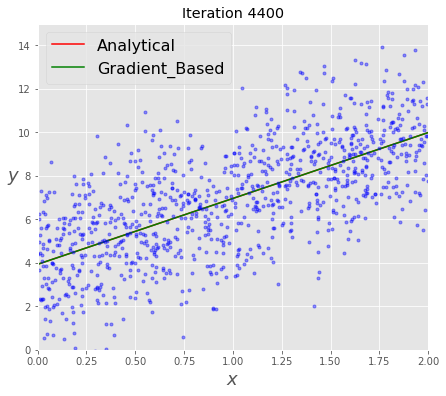

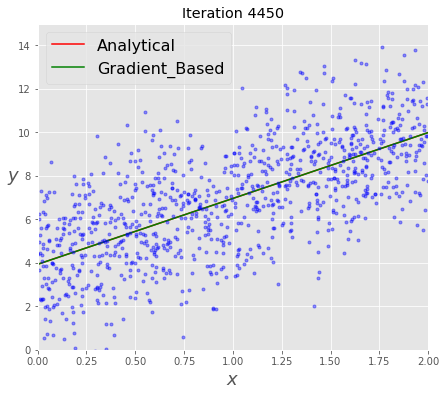

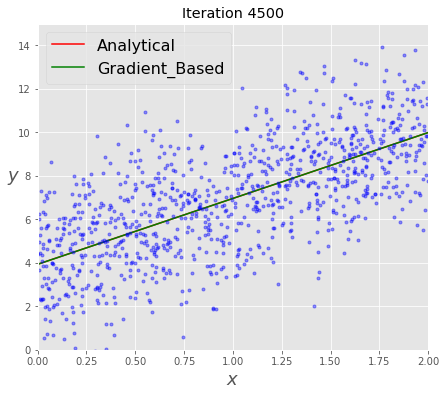

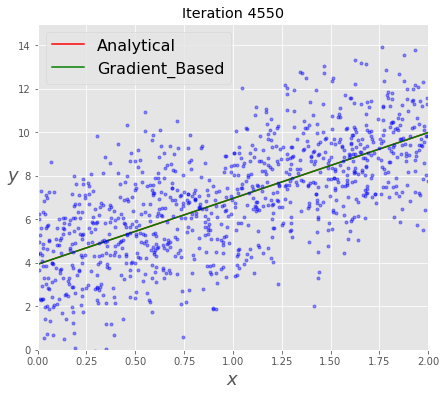

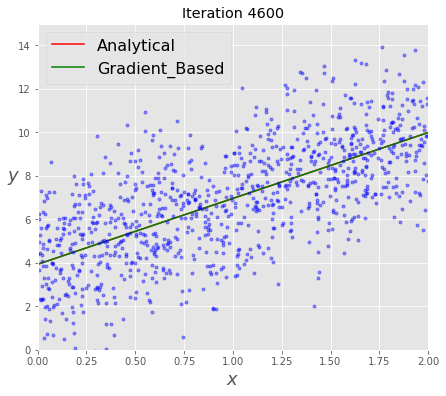

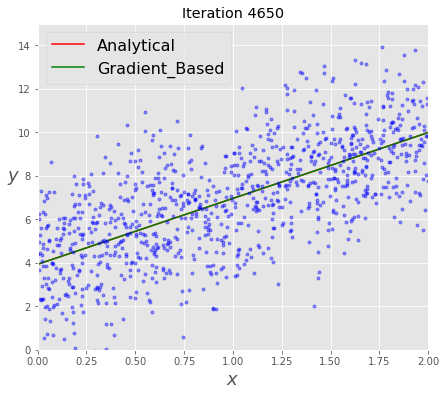

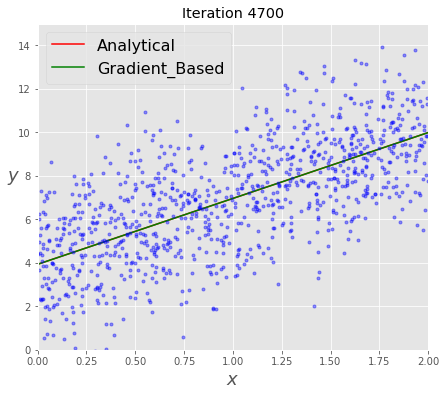

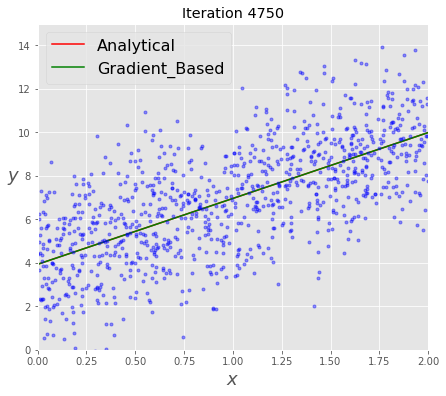

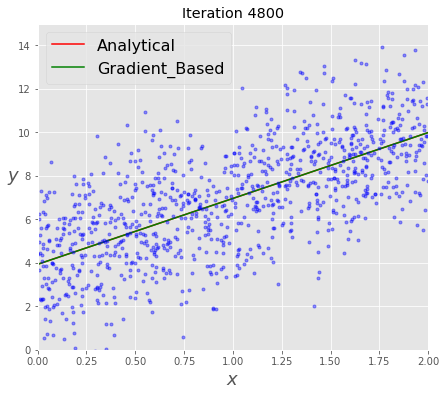

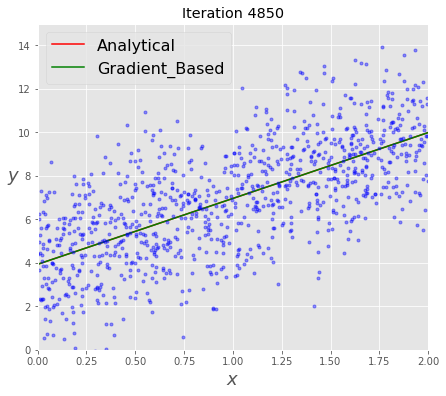

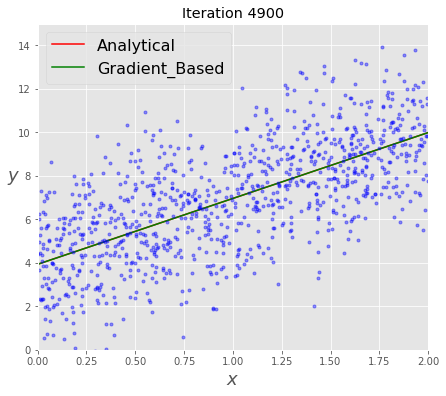

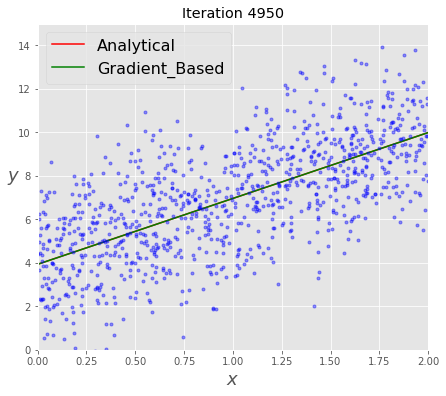

In [11]:
for i in np.arange(0,n_iter,50):
    fig,ax=plt.subplots(1,1,figsize=(7,6))
    
    X_ln = np.array([min(X),max(X)])          #Plot a line between min x and max x
    A_ln = np.c_[np.ones((2,1)),X_ln]
    y_ln = A_ln.dot(theta_analytical)                    #Analytical
    _theta_grad = theta_history[i][:,None]    #theta_history[i] should be (2x1)
    y_grad_ln=A_ln.dot(_theta_grad)
    
    ax.plot(X_ln,y_ln,'r-',lw=1.5)
    ax.plot(X_ln,y_grad_ln,'g-',lw=1.5)
    ax.plot(X,y,'b.',alpha=0.4)
    ax.set_xlabel("$x$", fontsize=18)
    ax.set_ylabel("$y$", rotation=0, fontsize=18)
    ax.set_xlim([0,2])
    ax.set_ylim([0,15])
    ax.set_title("Iteration {}".format(i))
    ax.legend(['Analytical','Gradient_Based'],fontsize=16)
#     fig.savefig("gradient_descent_fig_{}.png".format(int(i)),dpi=300)